##1.Setup and Imports

In [47]:
import pandas as pd  # Pandas for data manipulation and analysis
import io            # IO module for handling various types of I/O
import numpy as np   # NumPy for numerical operations

# Setting pandas display option to show all columns in DataFrame outputs
pd.set_option('display.max_columns', None)

# Importing 'ast' library for processing trees of the Python abstract syntax grammar
import ast

# Importing 'stats' from 'scipy' for statistical functions
from scipy import stats

# Importing 'matplotlib.pyplot' for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

##2.Data Loading and Preprocessing

In [48]:
# Loading data from a CSV file named 'usual_features.csv' into a pandas DataFrame
data = pd.read_csv('usual_features.csv')

In [49]:
# Displaying the first five rows of the DataFrame to get a quick overview of the data
data.head()


,ABP_SPeaks,ABP_Turns,Age,CaseID,ECG_RPeaks,Gender,IncludeFlag,PPG_SPeaks,PPG_Turns,SegDBP,SegSBP,SegmentID,SubjectID,WinID,WinSeqID,File
0,"[0.9750613658431216, 0.7654876957523871, 0.997...","[0.01696765687016835, 0.18744358800598918, 0.0...",71.0,50,"[0.7191176470588234, 0.7294117647058822, 0.702...",70,1,"[0.9867891412811203, 0.5711304022724234, 0.975...","[0.15679705356803095, 0.0017256572720865744, 0...",46.377382,121.559029,145.0,112,145.0,145.0,Copie de p083128.mat
1,"[0.9823791863807526, 0.7934358823782229, 0.995...","[0.0035018500185447503, 0.16256920654809193, 0...",71.0,50,"[0.7245508982035928, 0.7245508982035928, 0.727...",70,1,"[0.9468193882212245, 0.6396412868569045, 0.991...","[0.2023906383986644, 0.013245364597503806, 0.1...",45.609082,121.014234,147.0,112,147.0,147.0,Copie de p083128.mat
2,"[0.9041607967198663, 0.7059875839051473, 0.930...","[0.13552766996771687, 0.27833405577550446, 0.1...",71.0,50,"[0.7241887905604719, 0.6607669616519174, 0.731...",70,1,"[0.9162292190775887, 0.570549439986936, 0.9449...","[0.2188128230880428, 0.10328945683310443, 0.22...",43.653409,126.112952,149.0,112,149.0,149.0,Copie de p083128.mat
3,"[0.9700609329062179, 0.7592603624094446, 0.960...","[0.024815747052892558, 0.188819183066916, 0.01...",71.0,50,"[0.733528550512445, 0.7115666178623719, 0.7115...",70,1,"[0.9403660783004165, 0.5716904735546338, 0.926...","[0.07220352957996724, 0.23367666252826969, 0.1...",48.766096,127.340370,150.0,112,150.0,150.0,Copie de p083128.mat
4,"[0.7338105114630865, 0.9900867984029613, 0.757...","[0.0021608079864819684, 0.1789342597026248, 0....",71.0,50,"[0.729766803840878, 0.7503429355281207, 0.7270...",70,1,"[0.913079259084399, 0.5157356524267441, 0.9729...","[0.16878993593062708, 0.2400765592085516, 0.09...",47.089805,124.101403,151.0,112,151.0,151.0,Copie de p083128.mat


In [50]:
# Removing columns related to ABP (Arterial Blood Pressure) and ECG (Electrocardiogram) signals from the DataFrame.
# This is done because the focus of the analysis is solely on the PPG (Photoplethysmogram) signal.
# Columns 'ABP_SPeaks', 'ABP_Turns', 'ECG_RPeaks', and 'ECG_RPeaks' are dropped as they are not relevant for this specific analysis.
data = data.drop(columns=['ABP_SPeaks','ABP_Turns','ECG_RPeaks','ECG_RPeaks'])

In [51]:
data.head()

,Age,CaseID,Gender,IncludeFlag,PPG_SPeaks,PPG_Turns,SegDBP,SegSBP,SegmentID,SubjectID,WinID,WinSeqID,File
0,71.0,50,70,1,"[0.9867891412811203, 0.5711304022724234, 0.975...","[0.15679705356803095, 0.0017256572720865744, 0...",46.377382,121.559029,145.0,112,145.0,145.0,Copie de p083128.mat
1,71.0,50,70,1,"[0.9468193882212245, 0.6396412868569045, 0.991...","[0.2023906383986644, 0.013245364597503806, 0.1...",45.609082,121.014234,147.0,112,147.0,147.0,Copie de p083128.mat
2,71.0,50,70,1,"[0.9162292190775887, 0.570549439986936, 0.9449...","[0.2188128230880428, 0.10328945683310443, 0.22...",43.653409,126.112952,149.0,112,149.0,149.0,Copie de p083128.mat
3,71.0,50,70,1,"[0.9403660783004165, 0.5716904735546338, 0.926...","[0.07220352957996724, 0.23367666252826969, 0.1...",48.766096,127.340370,150.0,112,150.0,150.0,Copie de p083128.mat
4,71.0,50,70,1,"[0.913079259084399, 0.5157356524267441, 0.9729...","[0.16878993593062708, 0.2400765592085516, 0.09...",47.089805,124.101403,151.0,112,151.0,151.0,Copie de p083128.mat


In [52]:
# Printing the shape of the DataFrame to understand its dimensions (number of rows and columns)
print('Dataset Shape :',data.shape)

Dataset Shape : (1002, 13)


**1.Empty List Detection**

In [53]:
# Function to safely parse a string representation of a list and check if it's empty
def is_empty_list(column_value):
    try:
        # Parse the string to a list using ast.literal_eval for safe evaluation
        list_value = ast.literal_eval(column_value)
        # Check if the parsed list is empty and return True if it is
        return len(list_value) == 0
    except:
        # If parsing fails (e.g., if the string cannot be converted to a list), treat it as an empty list
        return True

# Applying the 'is_empty_list' function to each value in the 'PPG_SPeaks' and 'PPG_Turns' columns of the DataFrame.
# This is used to count how many entries in these columns are empty lists.
empty_counts = {
    'PPG_SPeaks_Empty': data['PPG_SPeaks'].apply(is_empty_list).sum(),
    'PPG_Turns_Empty': data['PPG_Turns'].apply(is_empty_list).sum()
}

# Printing the count of empty lists found in each of the specified columns
empty_counts


{'PPG_SPeaks_Empty': 6, 'PPG_Turns_Empty': 13}

In [54]:
# Columns to check for empty arrays
columns_to_check = ['PPG_SPeaks', 'PPG_Turns']

# Identify rows with empty arrays in any of the specified columns
rows_with_empty_arrays = data[columns_to_check].applymap(is_empty_list).any(axis=1)

# Remove these rows from the DataFrame
data = data[~rows_with_empty_arrays]

In [55]:
# Apply this function to each of the specified columns
empty_counts = {
    'PPG_SPeaks_Empty': data['PPG_SPeaks'].apply(is_empty_list).sum(),
    'PPG_Turns_Empty': data['PPG_Turns'].apply(is_empty_list).sum()
}

empty_counts

{'PPG_SPeaks_Empty': 0, 'PPG_Turns_Empty': 0}

**2. Visualization**

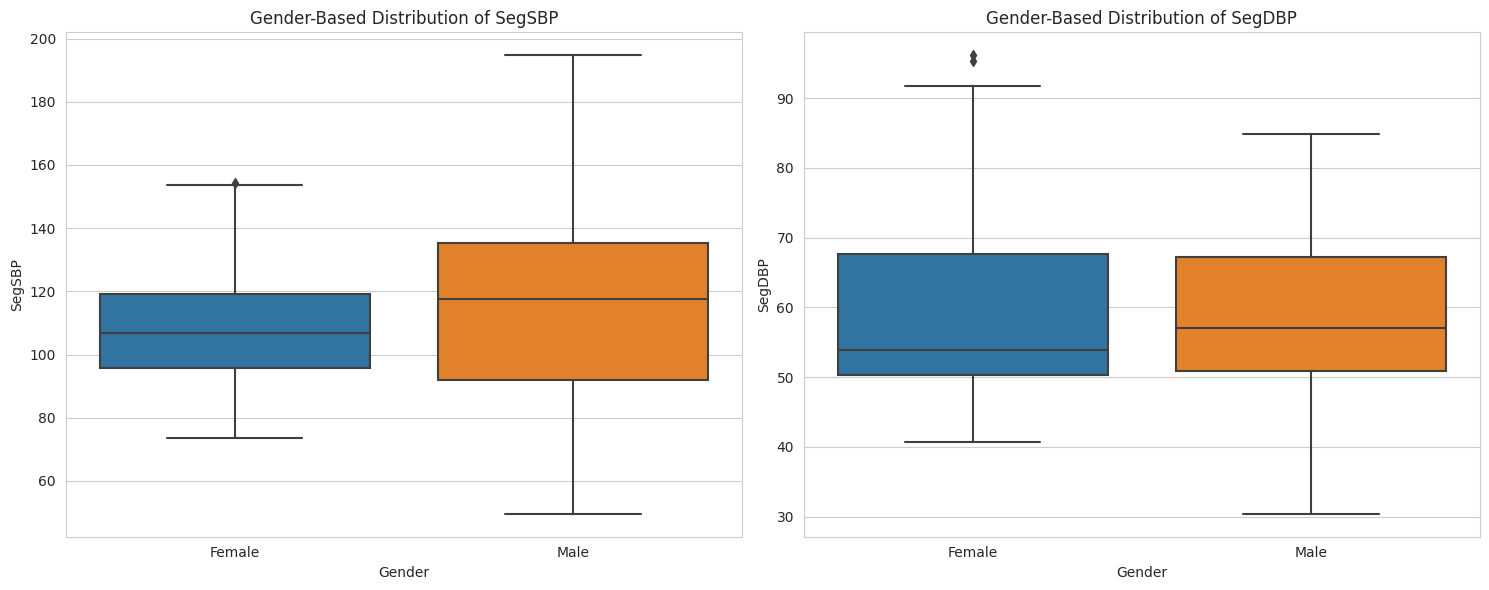

In [56]:
# Set the style of seaborn for better aesthetics
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for SegSBP
sns.boxplot(ax=axes[0], x='Gender', y='SegSBP', data=data)
axes[0].set_title('Gender-Based Distribution of SegSBP')
axes[0].set_xticklabels(['Female', 'Male'])

# Boxplot for SegDBP
sns.boxplot(ax=axes[1], x='Gender', y='SegDBP', data=data)
axes[1].set_title('Gender-Based Distribution of SegDBP')
axes[1].set_xticklabels(['Female', 'Male'])

# Display the plots
plt.tight_layout()
plt.show()


**3. PPG Signal List Length Analysis**

In [57]:
# Function to safely parse the string representation of a list
def safe_parse_list(s):
    try:
        return ast.literal_eval(s)
    except:
        return None

# Apply the function to 'PPG_SPeaks', 'ABP_SPeaks', and 'ECG_RPeaks'
data['PPG_SPeaks_Parsed'] = data['PPG_SPeaks'].apply(safe_parse_list)


# Filter out any rows where the parsing failed
data = data.dropna(subset=['PPG_SPeaks_Parsed'])

# Calculate the length of each valid list and check if all lengths are the same
length_counts_ppg = data['PPG_SPeaks_Parsed'].apply(lambda x: len(x) if x is not None else 0).value_counts()

# Check if all lengths are the same within each column
all_same_length_ppg = length_counts_ppg.size == 1

# Check if all PPG_SPeaks lists have the same length
print("Do all PPG_SPeaks lists have the same length? ", all_same_length_ppg)

# If not, show the counts of different lengths for a better understanding
if not all_same_length_ppg:
    print("\nLength counts for PPG_SPeaks lists:")
    print(length_counts_ppg.head())

# If all lengths are the same, you can print a confirmation or additional relevant information
else:
    print("\nAll PPG_SPeaks lists are of the same length.")


Do all PPG_SPeaks lists have the same length?  False

Length counts for PPG_SPeaks lists:
15    154
16    141
14    125
17    112
11     87
Name: PPG_SPeaks_Parsed, dtype: int64


In [58]:
# Modified function to standardize the list length based on a specified number of peaks
def standardize_peaks(row, num_peaks):
    try:
        peaks = ast.literal_eval(row)
    except:
        peaks = []

    # Ensure the length is exactly num_peaks
    return peaks[:num_peaks] + [None] * (num_peaks - len(peaks)) if len(peaks) < num_peaks else peaks[:num_peaks]

# Specify the number of peaks for each column
num_peaks_ppg = 10


# Apply the function to each column with the specified number of peaks
data['PPG_SPeaks_Standardized'] = data['PPG_SPeaks'].apply(lambda x: standardize_peaks(x, num_peaks_ppg))


# Create individual columns for each peak for each feature
for i in range(num_peaks_ppg):
    data[f'PPG_Peak_{i+1}'] = data['PPG_SPeaks_Standardized'].apply(lambda x: x[i])


# Optionally, drop the intermediate columns
data.drop(['PPG_SPeaks_Standardized'], axis=1, inplace=True)

data.head()


,Age,CaseID,Gender,IncludeFlag,PPG_SPeaks,PPG_Turns,SegDBP,SegSBP,SegmentID,SubjectID,WinID,WinSeqID,File,PPG_SPeaks_Parsed,PPG_Peak_1,PPG_Peak_2,PPG_Peak_3,PPG_Peak_4,PPG_Peak_5,PPG_Peak_6,PPG_Peak_7,PPG_Peak_8,PPG_Peak_9,PPG_Peak_10
0,71.0,50,70,1,"[0.9867891412811203, 0.5711304022724234, 0.975...","[0.15679705356803095, 0.0017256572720865744, 0...",46.377382,121.559029,145.0,112,145.0,145.0,Copie de p083128.mat,"[0.9867891412811203, 0.5711304022724234, 0.975...",0.986789,0.571130,0.975515,0.542162,0.899702,0.607524,0.937705,0.614518,0.981782,0.571557
1,71.0,50,70,1,"[0.9468193882212245, 0.6396412868569045, 0.991...","[0.2023906383986644, 0.013245364597503806, 0.1...",45.609082,121.014234,147.0,112,147.0,147.0,Copie de p083128.mat,"[0.9468193882212245, 0.6396412868569045, 0.991...",0.946819,0.639641,0.991002,0.603517,0.973558,0.626651,0.975852,0.590678,0.956493,0.552410
2,71.0,50,70,1,"[0.9162292190775887, 0.570549439986936, 0.9449...","[0.2188128230880428, 0.10328945683310443, 0.22...",43.653409,126.112952,149.0,112,149.0,149.0,Copie de p083128.mat,"[0.9162292190775887, 0.570549439986936, 0.9449...",0.916229,0.570549,0.944956,0.546040,0.958860,0.622132,0.939083,0.645081,0.964335,0.634627
3,71.0,50,70,1,"[0.9403660783004165, 0.5716904735546338, 0.926...","[0.07220352957996724, 0.23367666252826969, 0.1...",48.766096,127.340370,150.0,112,150.0,150.0,Copie de p083128.mat,"[0.9403660783004165, 0.5716904735546338, 0.926...",0.940366,0.571690,0.926420,0.561424,0.953283,0.562799,0.999431,0.494172,0.920434,0.521347
4,71.0,50,70,1,"[0.913079259084399, 0.5157356524267441, 0.9729...","[0.16878993593062708, 0.2400765592085516, 0.09...",47.089805,124.101403,151.0,112,151.0,151.0,Copie de p083128.mat,"[0.913079259084399, 0.5157356524267441, 0.9729...",0.913079,0.515736,0.972904,0.555154,0.972864,0.649959,0.892354,0.604160,0.943959,0.668074


In [59]:
data.drop(columns=['PPG_SPeaks', 'PPG_SPeaks_Parsed'], axis=1, inplace=True)

**4. Extracting Statistical Features**

In [60]:
# Function to convert string representation of a list to a list
def convert_to_list(row):
    try:
        return ast.literal_eval(row)
    except:
        return np.nan  # Return NaN if parsing fails

# Apply the function to your columns
data['PPG_Turns'] = data['PPG_Turns'].apply(convert_to_list)

# Drop rows where conversion to list failed
data = data.dropna(subset=['PPG_Turns'])

# Statistical feature extraction
data['PPG_Turns_Mean'] = data['PPG_Turns'].apply(np.mean)

data['PPG_Turns_Std'] = data['PPG_Turns'].apply(np.std)

# Normalization (Min-Max Scaling)
data['PPG_Turns_Mean_Normalized'] = (data['PPG_Turns_Mean'] - data['PPG_Turns_Mean'].min()) / (data['PPG_Turns_Mean'].max() - data['PPG_Turns_Mean'].min())

# Optional: Additional transformations (e.g., log, square root)
# Ensure to handle cases where NaN or Inf might be introduced
data['PPG_Turns_Log'] = np.log1p(data['PPG_Turns_Mean'])

data['PPG_Turns_Sqrt'] = np.sqrt(data['PPG_Turns_Mean'])

# View the first few rows of the preprocessed data
data.head()


,Age,CaseID,Gender,IncludeFlag,PPG_Turns,SegDBP,SegSBP,SegmentID,SubjectID,WinID,WinSeqID,File,PPG_Peak_1,PPG_Peak_2,PPG_Peak_3,PPG_Peak_4,PPG_Peak_5,PPG_Peak_6,PPG_Peak_7,PPG_Peak_8,PPG_Peak_9,PPG_Peak_10,PPG_Turns_Mean,PPG_Turns_Std,PPG_Turns_Mean_Normalized,PPG_Turns_Log,PPG_Turns_Sqrt
0,71.0,50,70,1,"[0.15679705356803095, 0.0017256572720865744, 0...",46.377382,121.559029,145.0,112,145.0,145.0,Copie de p083128.mat,0.986789,0.571130,0.975515,0.542162,0.899702,0.607524,0.937705,0.614518,0.981782,0.571557,0.099287,0.069096,0.307552,0.094661,0.315098
1,71.0,50,70,1,"[0.2023906383986644, 0.013245364597503806, 0.1...",45.609082,121.014234,147.0,112,147.0,147.0,Copie de p083128.mat,0.946819,0.639641,0.991002,0.603517,0.973558,0.626651,0.975852,0.590678,0.956493,0.552410,0.106742,0.071787,0.333307,0.101420,0.326714
2,71.0,50,70,1,"[0.2188128230880428, 0.10328945683310443, 0.22...",43.653409,126.112952,149.0,112,149.0,149.0,Copie de p083128.mat,0.916229,0.570549,0.944956,0.546040,0.958860,0.622132,0.939083,0.645081,0.964335,0.634627,0.142863,0.088775,0.458096,0.133537,0.377973
3,71.0,50,70,1,"[0.07220352957996724, 0.23367666252826969, 0.1...",48.766096,127.340370,150.0,112,150.0,150.0,Copie de p083128.mat,0.940366,0.571690,0.926420,0.561424,0.953283,0.562799,0.999431,0.494172,0.920434,0.521347,0.157595,0.075064,0.508989,0.146345,0.396982
4,71.0,50,70,1,"[0.16878993593062708, 0.2400765592085516, 0.09...",47.089805,124.101403,151.0,112,151.0,151.0,Copie de p083128.mat,0.913079,0.515736,0.972904,0.555154,0.972864,0.649959,0.892354,0.604160,0.943959,0.668074,0.133785,0.086491,0.426732,0.125561,0.365766


In [61]:
data=data.drop(columns=['PPG_Turns','CaseID','File','IncludeFlag','SubjectID'])

**5. Correlation Matrix**

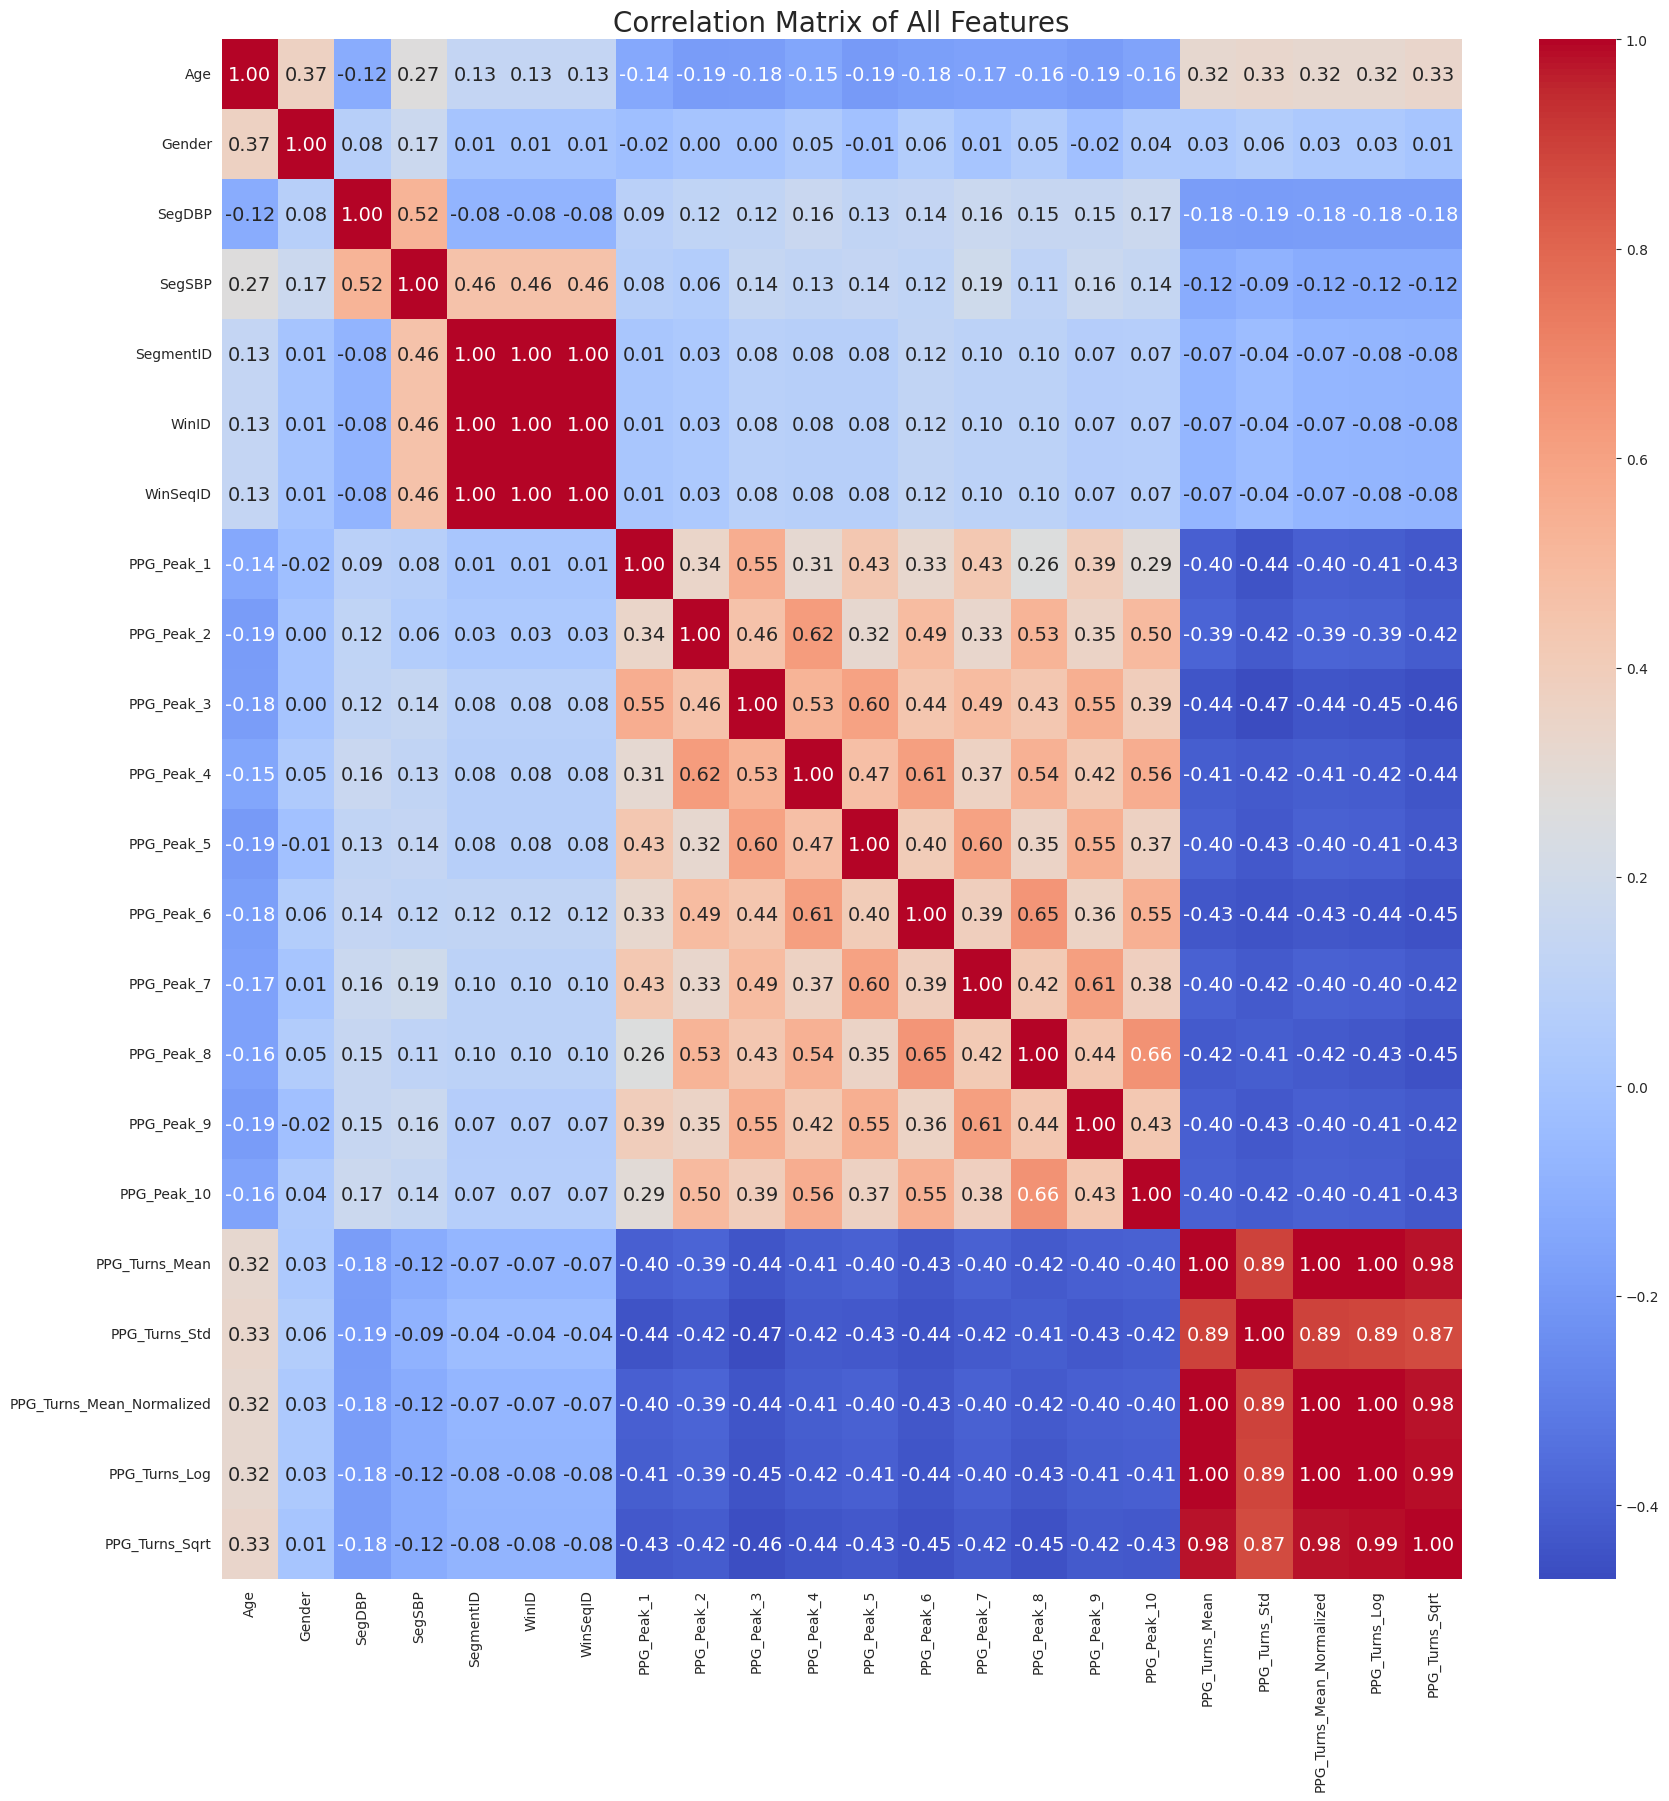

In [62]:
# Calculating the correlation matrix for the entire dataset
correlation_matrix = data.corr()

# Plotting the correlation matrix with increased annotation size
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 14})  # Increased font size for annotations
plt.title('Correlation Matrix of All Features', fontsize=20)  # Increased font size for the title
plt.xticks(fontsize=10, rotation=90)  # Rotate x-axis labels to 90 degrees
plt.yticks(fontsize=10, rotation=0)  # Keep y-axis labels horizontal
plt.show()


**6. Feature Importance**

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Assuming 'data' is your DataFrame and 'Target1', 'Target2' are the continuous target variables
X = data.drop(columns=['SegDBP', 'SegSBP'])
y = data[['SegDBP', 'SegSBP']]

# Initialize the RandomForestRegressor
forest = RandomForestRegressor()

# Wrap it in a MultiOutputRegressor
model = MultiOutputRegressor(forest)
model.fit(X, y)

# Get the feature importances
# This will give you a list of importances for each target
importances = np.array([est.feature_importances_ for est in model.estimators_])
mean_importances = importances.mean(axis=0)
indices = np.argsort(mean_importances)[::-1]

# Print the feature rankings based on mean importance across both targets
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({mean_importances[indices[f]]})")



Feature ranking:
1. feature Age (0.4438588198516591)
2. feature WinSeqID (0.06820385855794604)
3. feature WinID (0.060302534590647994)
4. feature SegmentID (0.05929948322329894)
5. feature PPG_Turns_Std (0.0546691642461714)
6. feature PPG_Peak_7 (0.03390675657548756)
7. feature PPG_Peak_9 (0.03118128069009695)
8. feature PPG_Peak_10 (0.027181562442900306)
9. feature PPG_Peak_2 (0.02524806384476683)
10. feature PPG_Peak_6 (0.024641635155065882)
11. feature PPG_Peak_1 (0.022238031710993977)
12. feature PPG_Peak_8 (0.021665283513892762)
13. feature Gender (0.020254922976389922)
14. feature PPG_Peak_4 (0.019976168182299386)
15. feature PPG_Peak_5 (0.018966856353242224)
16. feature PPG_Peak_3 (0.018486908997507066)
17. feature PPG_Turns_Log (0.013794117850684729)
18. feature PPG_Turns_Sqrt (0.01296103103462991)
19. feature PPG_Turns_Mean (0.011759938438903857)
20. feature PPG_Turns_Mean_Normalized (0.011403581763415284)


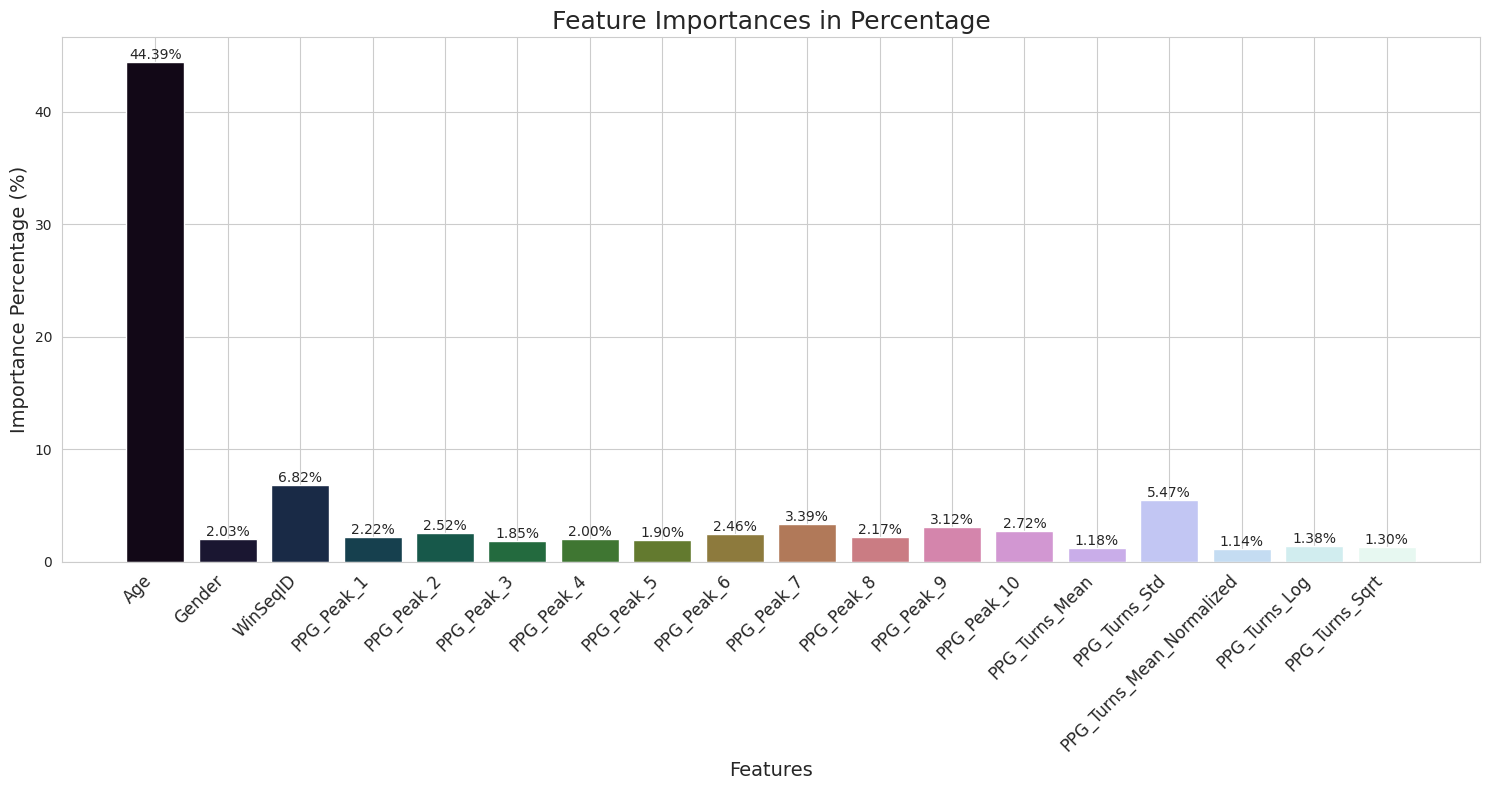

In [68]:
# Assuming 'mean_importances', 'indices', and 'feature_names' are defined as before
# and 'data' is the DataFrame with column names.
# Convert the mean importances to percentage
importances_percentage = 100.0 * (mean_importances / mean_importances.sum())

# We will remove 'SegDBP' and 'SegSBP' from the feature importances
# First, let's recreate the feature names without the target variables
non_target_feature_names = [feature for feature in data.columns if feature not in ('SegDBP', 'SegSBP')]

# Now we filter the importances to exclude the targets
# We find the indices of the features that are not our targets
non_target_indices = [i for i, feature in enumerate(data.columns[indices]) if feature in non_target_feature_names]

# We then use these indices to filter our importances and feature names
non_target_importances_percentage = importances_percentage[non_target_indices]
non_target_feature_names_sorted = [non_target_feature_names[i] for i in non_target_indices]

# Plotting the non-target feature importances
plt.figure(figsize=(15, 8))
bars = plt.bar(non_target_feature_names_sorted, non_target_importances_percentage, color=sns.color_palette("cubehelix", len(non_target_feature_names_sorted)))

# Add the percentage values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom', ha='center', fontsize=10)

# Set plot title and labels
plt.title('Feature Importances in Percentage', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance Percentage (%)', fontsize=14)

# Rotate the x-axis feature names for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()


**7. Principal Component Analysis (PCA)**

[4.04213884e-01 1.51332949e-01 1.01530618e-01 6.62319523e-02
 6.06015761e-02 3.74227948e-02 2.89611096e-02 2.74451743e-02
 2.53721798e-02 2.20918333e-02 2.03791729e-02 1.77691506e-02
 1.45468744e-02 1.30342428e-02 8.06259146e-03 1.00012907e-03
 3.76762774e-06 1.47547108e-33 9.31434469e-35 8.27626203e-36]


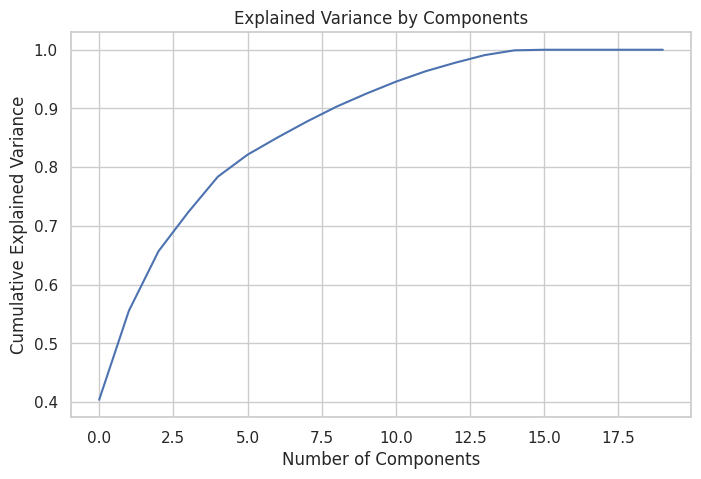

Number of components to keep 95% of variance: 12


In [ ]:
# Standardize the features before PCA since PCA is affected by scale
X_standardized = StandardScaler().fit_transform(X)

# Initialize PCA
# Let's start by keeping all components to see the explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Print the explained variance ratio for each component
print(pca.explained_variance_ratio_)

# Plot the cumulative variance explained by all the components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Based on the cumulative variance plot, choose a number of components for further analysis
# For example, to keep 95% of the variance, look for the point where cumulative variance reaches 0.95
components_for_95_variance = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components to keep 95% of variance: {components_for_95_variance}")

# Now initialize PCA with the desired number of components
pca = PCA(n_components=components_for_95_variance)
X_pca_reduced = pca.fit_transform(X_standardized)

# X_pca_reduced is now the reduced dataset you can use for further analysis or building machine learning models


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA since PCA is affected by scale
X_standardized = StandardScaler().fit_transform(X)

# Initialize PCA with 11 components
pca = PCA(n_components=12)

# Fit and transform the standardized data using PCA
X_pca_reduced = pca.fit_transform(X_standardized)

# Convert the reduced PCA components into a DataFrame
X_pca_reduced_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(X_pca_reduced.shape[1])])

X_pca_reduced_df.head()  # Display the first few rows of the DataFrame

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,4.150840,-0.783744,-2.772103,4.807293,-3.645858,-0.024848,-0.688403,0.087716,-0.064469,0.517865,-1.387362,-0.393216
1,3.957996,-0.708907,-2.087637,4.942465,-3.539360,-0.219279,0.259745,0.598064,-0.240939,-0.077341,-1.030964,-0.621308
2,5.327339,-0.462529,-1.175988,4.820070,-3.017026,0.662999,-0.468697,0.082705,-0.359348,0.654519,-0.759800,-0.673654
3,6.296740,-0.520217,-1.750125,5.720579,-3.832686,-0.088499,0.293034,0.360144,-0.122098,-0.380256,-0.434631,-0.223939
4,5.191218,-0.494526,-1.547147,4.681004,-3.053572,0.523005,-0.298485,-0.026845,-0.979050,1.339628,-0.567380,-0.430258


##3. Model Training

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced_df, data[['SegDBP', 'SegSBP']], test_size=0.2, random_state=42)

# Separating the targets
y_train_target1 = y_train['SegDBP']
y_train_target2 = y_train['SegSBP']
y_test_target1 = y_test['SegDBP']
y_test_target2 = y_test['SegSBP']

# Training the first XGBoost model for the first target
model_target1 = XGBRegressor(objective='reg:squarederror')
model_target1.fit(X_train, y_train_target1)

# Predicting the test set results for the first target
y_pred_target1 = model_target1.predict(X_test)
mse_target1 = mean_squared_error(y_test_target1, y_pred_target1)
print(f"Mean Squared Error for Target 1: {mse_target1}")

# Training the second XGBoost model for the second target
model_target2 = XGBRegressor(objective='reg:squarederror')
model_target2.fit(X_train, y_train_target2)

# Predicting the test set results for the second target
y_pred_target2 = model_target2.predict(X_test)
mse_target2 = mean_squared_error(y_test_target2, y_pred_target2)
print(f"Mean Squared Error for Target 2: {mse_target2}")


Mean Squared Error for Target 1: 82.46664394339534
Mean Squared Error for Target 2: 273.3617675479496
